In [76]:
from PIL import Image
import numpy as np
import os
from random import shuffle
from tqdm import tqdm
import matplotlib.pyplot as plt

In [77]:
TRAIN_DIR = '/content/Train'
TEST_DIR = '/content/Test'

In [78]:
IMG_SIZE = 120


In [79]:
def label_img(img_name):
    img_name = img_name.upper()   # normalize case

    if 'NIKE' in img_name:
        return [1, 0]
    elif 'ADIDAS' in img_name:
        return [0, 1]
    else:
        raise ValueError("Unknown label for image: " + img_name)

In [80]:
def create_train_data():
    train_data = []
    for img in tqdm(os.listdir(TRAIN_DIR)):
        label = label_img(img)
        path = os.path.join(TRAIN_DIR, img)
        ############################################################
        #    This part is different from sentdex's tutorial
        # Chose to use PIL instead of cv2 for image pre-processing
        ############################################################

        img = Image.open(path) #Read image syntax with PIL Library
        img = img.convert('L') #Grayscale conversion with PIL library
      #  img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS) #Resizing image syntax with PIL Library
        img = img.resize((IMG_SIZE, IMG_SIZE), Image.Resampling.LANCZOS)

        ############################################################

        train_data.append([np.array(img), np.array(label)])
        shuffle(train_data)
       # np.save('train_data.npy', train_data) #.npy extension = numpy file
        np.save('train_data.npy', np.array(train_data, dtype=object))
    return train_data



In [81]:
train_data = create_train_data()
#plt.imshow(train_data[43][0], cmap = 'gist_gray')
#print(train_data[43][1])


100%|██████████| 100/100 [00:00<00:00, 334.15it/s]


train_data = create_train_data()
plt.imshow(train_data[43][0], cmap = 'gist_gray')
print(train_data[43][1])  explain this

Perfect, this is a sanity check to see if your dataset was created correctly. Let’s break it down line by line in simple terms 👇

train_data = create_train_data()
🧱 What this does

Calls your function create_train_data()

That function:

Reads all images from TRAIN_DIR

Converts them to grayscale

Resizes them to IMG_SIZE × IMG_SIZE

Creates labels (NIKE / ADIDAS)

Stores them as [image_array, label_array]

The result is stored in train_data

So now:

train_data[i] = [image_array, label_array]
plt.imshow(train_data[43][0], cmap='gist_gray')
🖼️ What this does

train_data[43] → gets the 44th sample from your dataset

train_data[43][0] → gets the image part of that sample
(because index 0 = image, index 1 = label)

So this line:

Takes the 44th image

Displays it using matplotlib

cmap='gist_gray' → shows it in grayscale

Basically: “Show me one training image”.

print(train_data[43][1])
🏷️ What this does

train_data[43][1] → gets the label of the same image

This will print something like:

[1 0]   # NIKE

or

[0 1]   # ADIDAS

So this line:

Prints the one-hot encoded label of the image you just displayed

🧠 Together, these 3 lines mean:

Build the training dataset

Show me one sample image

Tell me what class it belongs to

This is a debug / verification step to check:

✅ Images are loading correctly

✅ Preprocessing works (grayscale, resize)

✅ Labels match the image

🧪 Example output

You might see:

An image of a shoe 👟

And in console:

[1 0]

Meaning: This image is NIKE

🎯 In short

train_data[43][0] → the image

train_data[43][1] → the label

imshow(...) → displays the image

print(...) → shows its class

In [82]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, Input

In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Input

model = Sequential()

model.add(Input(shape=(IMG_SIZE, IMG_SIZE, 1)))

# Block 1
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Block 2
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Block 3
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Classifier
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)              │ (None, 120, 120, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 120, 120, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 60, 60, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 60, 60, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 30, 30, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 30, 30, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │     7,373,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,513,186 (28.66 MB)

 Trainable params: 7,513,186 (28.66 MB)

 Non-trainable params: 0 (0.00 B)

In [84]:
import numpy as np

X = np.array([i[0] for i in train_data])
y = np.array([i[1] for i in train_data])

# Add channel dimension
X = X / 255.0
X = X.reshape(-1, 120, 120, 1)

# Normalize (important for CNNs)


print("New X shape:", X.shape)
print("y shape:", y.shape)

New X shape: (100, 120, 120, 1)
y shape: (100, 2)


In [96]:
history = model.fit(
    X, y,
    epochs=27,

)

Epoch 1/27
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.9630 - loss: 0.0770
Epoch 2/27
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.9845 - loss: 0.0263
Epoch 3/27
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.9845 - loss: 0.0205
Epoch 4/27
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 1.0000 - loss: 0.0027
Epoch 5/27
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 1.0000 - loss: 0.0020
Epoch 6/27
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 1.0000 - loss: 0.0014
Epoch 7/27
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 1.0000 - loss: 2.3028e-04
Epoch 8/27
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 996ms/step - accuracy: 1.0000 - loss: 1.5879e-04
Epoch 9/27
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 1.0000 - loss: 1.2303e-04
Epoch 10/27
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 981ms/step - accuracy: 1.0000 - loss: 2.4575e-05
Epoch 11/27
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 1.0000 - loss: 3.6265e-05
Epoch 12/27
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 1.0000 - loss: 0.0021

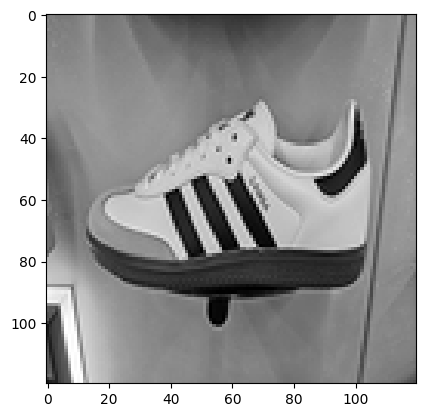

In [99]:
img = Image.open('/content/ Adidastest.jpg') #Read image syntax with PIL Library
img = img.convert('L') #Grayscale conversion with PIL library
#  img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS) #Resizing image syntax with PIL Library
img = img.resize((IMG_SIZE, IMG_SIZE), Image.Resampling.LANCZOS)


plt.imshow(np.array(img), cmap = 'gist_gray')
plt.show()


    if word_label == 'NIKE': return [1,0] #one hot encoding
    elif word_label == 'ADIDAS': return [0,1] #one hot encoding

In [100]:
model.predict(np.array(img).reshape(-1,IMG_SIZE,IMG_SIZE,1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


array([[0., 1.]], dtype=float32)

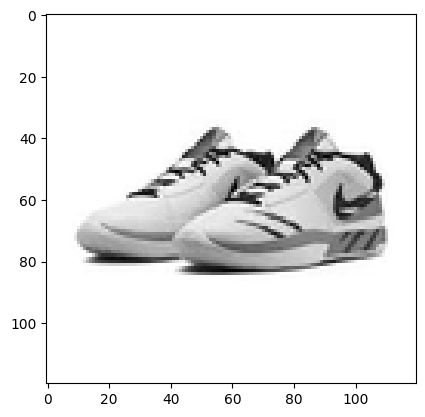

In [101]:


img = Image.open('/content/Niketest.jpeg') #Read image syntax with PIL Library
img = img.convert('L') #Grayscale conversion with PIL library
#  img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS) #Resizing image syntax with PIL Library
img = img.resize((IMG_SIZE, IMG_SIZE), Image.Resampling.LANCZOS)


plt.imshow(np.array(img), cmap = 'gist_gray')
plt.show()


    if word_label == 'NIKE': return [1,0] #one hot encoding
    elif word_label == 'ADIDAS': return [0,1] #one hot encoding

In [89]:
model.predict(np.array(img).reshape(-1,IMG_SIZE,IMG_SIZE,1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


array([[0., 1.]], dtype=float32)

In [90]:
print(history.history.keys())
print("Final train accuracy:", history.history['accuracy'][-1])
print("Final val accuracy:", history.history['val_accuracy'][-1])

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Final train accuracy: 0.9777777791023254
Final val accuracy: 0.8999999761581421


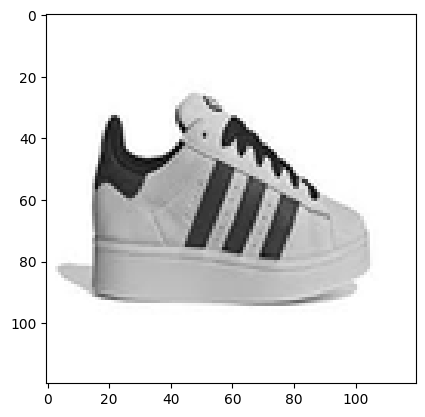

In [102]:
img = Image.open('/content/AdidasTest1jpg.jpeg') #Read image syntax with PIL Library
img = img.convert('L') #Grayscale conversion with PIL library
#  img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS) #Resizing image syntax with PIL Library
img = img.resize((IMG_SIZE, IMG_SIZE), Image.Resampling.LANCZOS)


plt.imshow(np.array(img), cmap = 'gist_gray')
plt.show()


In [103]:
model.predict(np.array(img).reshape(-1,IMG_SIZE,IMG_SIZE,1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


array([[0., 1.]], dtype=float32)

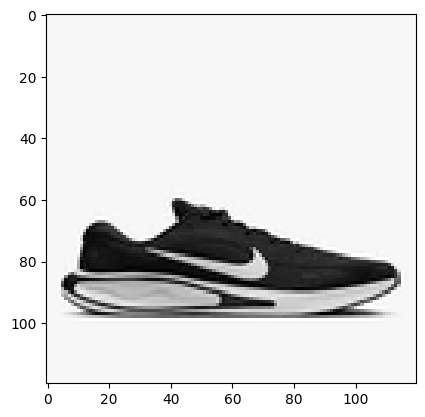

In [104]:

img = Image.open('/content/NIKETest1.jpeg') #Read image syntax with PIL Library
img = img.convert('L') #Grayscale conversion with PIL library
#  img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS) #Resizing image syntax with PIL Library
img = img.resize((IMG_SIZE, IMG_SIZE), Image.Resampling.LANCZOS)


plt.imshow(np.array(img), cmap = 'gist_gray')
plt.show()


In [105]:
model.predict(np.array(img).reshape(-1,IMG_SIZE,IMG_SIZE,1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


array([[1., 0.]], dtype=float32)

In [95]:
unique, counts = np.unique(np.argmax(y, axis=1), return_counts=True)
print(dict(zip(unique, counts)))

{np.int64(0): np.int64(50), np.int64(1): np.int64(50)}
